In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import plotly.graph_objects as go
import warnings

In [695]:
data = pd.read_csv(r"C:\Users\sandr\OneDrive\Documents\A DATA\indiamatrimonyfemale.csv")
data.head()

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
0,"25, 5' 05"" (165 cm)","Christian, Catholic",English,Not Specified,", USA",I am a simple girl with a good personality. I ...
1,"27, 5' 01"" (155 cm)","Sikh, Arora",Punjabi,Government / Defence,", Jaipur, Rajasthan, India",My Daughter is a smart and dynamic girl brough...
2,"24, 5' 03"" (160 cm)","Hindu, Teli",Marathi,Hotels & Travel,", Nagpur, Maharashtra, India",I am a simple girl with a good personality. I ...
3,"24, 5' 02"" (157 cm)","Christian, Roman Catholic",Hindi,Not Specified,", Italy","I belong to ""Roman Catholic"" caste and I am in..."
4,"35, 5' 00"" (152 cm)","Muslim, Sunni",Persian,Not Specified,", Australia",I am a simple girl with a good personality. I ...


# cleaning columns (age, height, religion, caste)

In [696]:
data.Mother_Tongue.value_counts()

Hindi            5526
Tamil            2645
Punjabi          1919
Malayalam        1423
Telugu           1380
English          1296
Marathi          1153
Urdu             1012
Mother_Tongue     998
Gujarati          647
Kannada           628
Bengali           520
Konkani           208
Odia              193
Bhojpuri          135
Sindhi            132
Others            118
Arabic            116
Nepali             81
Assamese           79
French             67
Garhwali           66
Rajasthani         63
Himachali          59
Tulu               55
Sinhala            53
Maithili           48
Haryanvi           44
Kashmiri           43
Marwari            36
Kumaoni            25
Bodo               20
German             18
Malay              18
Kutchi             17
Dogri              16
Chattisgarhi       15
Persian            12
Parsi              12
Romanian           11
Russian            11
Spanish            10
Portugese           9
Pashto              9
Manipuri            7
Magahi    

In [697]:
## Check for duplicates
data.duplicated().any()

True

In [698]:
duplicateRows = data[data.duplicated()]
duplicateRows

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
41,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
62,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
83,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
104,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
125,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
...,...,...,...,...,...,...
20915,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
20936,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
20957,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
20962,"27, 5' 03"" (160 cm)","Hindu, Gupta",Hindi,Non-Working,", Delhi, India",Not Available...Read more


In [699]:
# delete rows with no informations
data = data[~data.isin(['Mother_Tongue']).any(axis=1)]


In [700]:
duplicateRows = data[data.duplicated()]
duplicateRows

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
940,"30, 5' 06"" (167 cm)","Hindu, Gounder",Tamil,Not Specified,", Malaysia",I am currently living in malaysia. I am a smar...
1473,"30, 5' 03"" (160 cm)","Hindu, Gupta",Hindi,Others,", Delhi, India",My Daughter is a smart and dynamic girl brough...
2480,"27, 5' 04"" (162 cm)","Hindu, Gupta",Hindi,Non-Working,", Delhi, India","This profile is of my Daughter, who is simple ..."
2992,"27, 5' 00"" (152 cm)","Hindu, Gupta",Hindi,Non-Working,", Delhi, India","This profile is of my Daughter, who is simple ..."
3286,"28, 5' 00"" (152 cm)","Hindu, Gupta",Hindi,Non-Working,", Delhi, India",My Daughter is a smart and dynamic girl brough...
...,...,...,...,...,...,...
20372,"32, 5' 05"" (165 cm)","Hindu, Kamma",Telugu,Not Specified,", USA",I am a simple girl with a good personality. I ...
20476,"39, 5' 04"" (162 cm)","Hindu, Brahmin",Marathi,"HR, Admin & Managers",", Mumbai, Maharashtra, India","This profile is of my Daughter, who is simple ..."
20580,"32, 5' 03"" (160 cm)","Hindu, Gupta",Hindi,Non-Working,", Delhi, India",Not Available...Read more
20962,"27, 5' 03"" (160 cm)","Hindu, Gupta",Hindi,Non-Working,", Delhi, India",Not Available...Read more


In [701]:
## Missing data check
data.isna().sum()

Age_Height        0
Religion_Caste    0
Mother_Tongue     2
Profession        0
Location          0
message           0
dtype: int64

In [702]:
data[data.isnull().any(axis=1)]

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
17027,"23, 6' 00"" (182 cm)","Sikh, Jatt",NaN,Not Specified,", India","I am a ""~CASTE~"" girl, who follows its traditi..."
17781,"25, 6' 00"" (182 cm)","Hindu, Agarwal",NaN,Not Specified,", India",I am a beautiful and natural complexioned gir...


In [703]:
#to fix Mother Tongue, I check other religion_caste mother tongue
df=data[data['Religion_Caste'].str.contains("Sikh, Jatt")] 
df.Mother_Tongue.mode()
#Ifill with pungabi


0    Punjabi
dtype: object

In [704]:
data.Mother_Tongue.loc[[17027]]=data.Mother_Tongue.loc[[17027]].fillna('Punjabi') 


In [705]:
data.loc[[17027]]

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
17027,"23, 6' 00"" (182 cm)","Sikh, Jatt",Punjabi,Not Specified,", India","I am a ""~CASTE~"" girl, who follows its traditi..."


In [706]:
#to fix Mother Tongue, I check other religion_caste mother tongue
df2=data[data['Religion_Caste'].str.contains("Hindu, Agarwal")] 
df2.Mother_Tongue.mode()
#Ifill with hindi


0    Hindi
dtype: object

In [707]:
data.Mother_Tongue.loc[[17781]]=data.Mother_Tongue.loc[[17781]].fillna('Hindi') 

In [708]:
data.isna().sum()

Age_Height        0
Religion_Caste    0
Mother_Tongue     0
Profession        0
Location          0
message           0
dtype: int64

In [709]:
data

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
0,"25, 5' 05"" (165 cm)","Christian, Catholic",English,Not Specified,", USA",I am a simple girl with a good personality. I ...
1,"27, 5' 01"" (155 cm)","Sikh, Arora",Punjabi,Government / Defence,", Jaipur, Rajasthan, India",My Daughter is a smart and dynamic girl brough...
2,"24, 5' 03"" (160 cm)","Hindu, Teli",Marathi,Hotels & Travel,", Nagpur, Maharashtra, India",I am a simple girl with a good personality. I ...
3,"24, 5' 02"" (157 cm)","Christian, Roman Catholic",Hindi,Not Specified,", Italy","I belong to ""Roman Catholic"" caste and I am in..."
4,"35, 5' 00"" (152 cm)","Muslim, Sunni",Persian,Not Specified,", Australia",I am a simple girl with a good personality. I ...
...,...,...,...,...,...,...
20973,"23, 5' 07"" (170 cm)","Hindu, Settibalija",Telugu,Not Specified,", Hitoor, Andhra Pradesh, India",I am a simple girl with a good personality. I ...
20974,"22, 5' 05"" (165 cm)","Hindu, Settibalija",Telugu,Not Specified,", Hitoor, Andhra Pradesh, India",I am a simple girl with a good personality. I ...
20975,"22, 5' 05"" (165 cm)","Muslim, Islam",Malayalam,Not Specified,", Thiruvananthapuram, Kerala, India","This profile is of my Daughter, who is simple ..."
20976,"24, 5' 03"" (160 cm)","Hindu, Dhangar",Marathi,Not Specified,", Pune, Maharashtra, India",I have made my profile here with the reference...


In [710]:
cat =data['Age_Height'].str.split(',').apply(pd.Series).iloc[:,[0,1]]
cat

,0,1
0,25,"5' 05"" (165 cm)"
1,27,"5' 01"" (155 cm)"
2,24,"5' 03"" (160 cm)"
3,24,"5' 02"" (157 cm)"
4,35,"5' 00"" (152 cm)"
...,...,...
20973,23,"5' 07"" (170 cm)"
20974,22,"5' 05"" (165 cm)"
20975,22,"5' 05"" (165 cm)"
20976,24,"5' 03"" (160 cm)"


In [711]:
cat=cat.rename(columns={0:'Age', 1: 'Height'})
cat

,Age,Height
0,25,"5' 05"" (165 cm)"
1,27,"5' 01"" (155 cm)"
2,24,"5' 03"" (160 cm)"
3,24,"5' 02"" (157 cm)"
4,35,"5' 00"" (152 cm)"
...,...,...
20973,23,"5' 07"" (170 cm)"
20974,22,"5' 05"" (165 cm)"
20975,22,"5' 05"" (165 cm)"
20976,24,"5' 03"" (160 cm)"


In [712]:
cat.Height=cat.Height.str.replace(r"[^|]*[(]", '', regex=True) #any caratere before (
cat.Height=cat.Height.str.replace(r"c[^|]*$", '', regex=True) #any caractere apres c jusqu'a la fin du string $
cat.head()

,Age,Height
0,25,165
1,27,155
2,24,160
3,24,157
4,35,152


In [713]:
data=data.join(cat)

In [714]:
data.head(3)

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message,Age,Height
0,"25, 5' 05"" (165 cm)","Christian, Catholic",English,Not Specified,", USA",I am a simple girl with a good personality. I ...,25,165
1,"27, 5' 01"" (155 cm)","Sikh, Arora",Punjabi,Government / Defence,", Jaipur, Rajasthan, India",My Daughter is a smart and dynamic girl brough...,27,155
2,"24, 5' 03"" (160 cm)","Hindu, Teli",Marathi,Hotels & Travel,", Nagpur, Maharashtra, India",I am a simple girl with a good personality. I ...,24,160


In [715]:
social=data['Religion_Caste'].str.split(',').apply(pd.Series).iloc[:,[0,1]]
social

,0,1
0,Christian,Catholic
1,Sikh,Arora
2,Hindu,Teli
3,Christian,Roman Catholic
4,Muslim,Sunni
...,...,...
20973,Hindu,Settibalija
20974,Hindu,Settibalija
20975,Muslim,Islam
20976,Hindu,Dhangar


In [716]:
social=social.rename(columns={0:'Religion', 1: 'Caste'})

In [717]:
data=data.join(social)

In [718]:
data['State'] = data['Location'] 

In [719]:
data.Location=data.Location.str.replace(r"[^|]*[,]", '', regex=True) #delete all [^|]* before "," [,]


In [720]:
#df=data[data['Location'].str.contains("India")==False]
#df.Location.value_counts()

In [721]:
data.State = np.where(data['State'].str.contains("India") ==False, ",0,foreign,foreign", data.State)
#data.State=data.State.replace(np.nan, ",1,2,foreign")
data

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message,Age,Height,Religion,Caste,State
0,"25, 5' 05"" (165 cm)","Christian, Catholic",English,Not Specified,USA,I am a simple girl with a good personality. I ...,25,165,Christian,Catholic,",0,foreign,foreign"
1,"27, 5' 01"" (155 cm)","Sikh, Arora",Punjabi,Government / Defence,India,My Daughter is a smart and dynamic girl brough...,27,155,Sikh,Arora,", Jaipur, Rajasthan, India"
2,"24, 5' 03"" (160 cm)","Hindu, Teli",Marathi,Hotels & Travel,India,I am a simple girl with a good personality. I ...,24,160,Hindu,Teli,", Nagpur, Maharashtra, India"
3,"24, 5' 02"" (157 cm)","Christian, Roman Catholic",Hindi,Not Specified,Italy,"I belong to ""Roman Catholic"" caste and I am in...",24,157,Christian,Roman Catholic,",0,foreign,foreign"
4,"35, 5' 00"" (152 cm)","Muslim, Sunni",Persian,Not Specified,Australia,I am a simple girl with a good personality. I ...,35,152,Muslim,Sunni,",0,foreign,foreign"
...,...,...,...,...,...,...,...,...,...,...,...
20973,"23, 5' 07"" (170 cm)","Hindu, Settibalija",Telugu,Not Specified,India,I am a simple girl with a good personality. I ...,23,170,Hindu,Settibalija,", Hitoor, Andhra Pradesh, India"
20974,"22, 5' 05"" (165 cm)","Hindu, Settibalija",Telugu,Not Specified,India,I am a simple girl with a good personality. I ...,22,165,Hindu,Settibalija,", Hitoor, Andhra Pradesh, India"
20975,"22, 5' 05"" (165 cm)","Muslim, Islam",Malayalam,Not Specified,India,"This profile is of my Daughter, who is simple ...",22,165,Muslim,Islam,", Thiruvananthapuram, Kerala, India"
20976,"24, 5' 03"" (160 cm)","Hindu, Dhangar",Marathi,Not Specified,India,I have made my profile here with the reference...,24,160,Hindu,Dhangar,", Pune, Maharashtra, India"


In [722]:
data[['c','ville','State_Region', 'Country']] = data.State.str.split(",",expand=True)
data

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message,Age,Height,Religion,Caste,State,c,ville,State_Region,Country
0,"25, 5' 05"" (165 cm)","Christian, Catholic",English,Not Specified,USA,I am a simple girl with a good personality. I ...,25,165,Christian,Catholic,",0,foreign,foreign",,0,foreign,foreign
1,"27, 5' 01"" (155 cm)","Sikh, Arora",Punjabi,Government / Defence,India,My Daughter is a smart and dynamic girl brough...,27,155,Sikh,Arora,", Jaipur, Rajasthan, India",,Jaipur,Rajasthan,India
2,"24, 5' 03"" (160 cm)","Hindu, Teli",Marathi,Hotels & Travel,India,I am a simple girl with a good personality. I ...,24,160,Hindu,Teli,", Nagpur, Maharashtra, India",,Nagpur,Maharashtra,India
3,"24, 5' 02"" (157 cm)","Christian, Roman Catholic",Hindi,Not Specified,Italy,"I belong to ""Roman Catholic"" caste and I am in...",24,157,Christian,Roman Catholic,",0,foreign,foreign",,0,foreign,foreign
4,"35, 5' 00"" (152 cm)","Muslim, Sunni",Persian,Not Specified,Australia,I am a simple girl with a good personality. I ...,35,152,Muslim,Sunni,",0,foreign,foreign",,0,foreign,foreign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20973,"23, 5' 07"" (170 cm)","Hindu, Settibalija",Telugu,Not Specified,India,I am a simple girl with a good personality. I ...,23,170,Hindu,Settibalija,", Hitoor, Andhra Pradesh, India",,Hitoor,Andhra Pradesh,India
20974,"22, 5' 05"" (165 cm)","Hindu, Settibalija",Telugu,Not Specified,India,I am a simple girl with a good personality. I ...,22,165,Hindu,Settibalija,", Hitoor, Andhra Pradesh, India",,Hitoor,Andhra Pradesh,India
20975,"22, 5' 05"" (165 cm)","Muslim, Islam",Malayalam,Not Specified,India,"This profile is of my Daughter, who is simple ...",22,165,Muslim,Islam,", Thiruvananthapuram, Kerala, India",,Thiruvananthapuram,Kerala,India
20976,"24, 5' 03"" (160 cm)","Hindu, Dhangar",Marathi,Not Specified,India,I have made my profile here with the reference...,24,160,Hindu,Dhangar,", Pune, Maharashtra, India",,Pune,Maharashtra,India


In [723]:
data[data.isnull().any(axis=1)]

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message,Age,Height,Religion,Caste,State,c,ville,State_Region,Country
6,"27, 4' 11"" (149 cm)","Hindu, Other",Hindi,Doctor,India,My Sister is a smart and dynamic girl brought ...,27,149,Hindu,Other,", Delhi, India",,Delhi,India,None
7,"33,","Hindu, Gupta",Hindi,Not Specified,India,My Daughter is a smart and dynamic girl brough...,33,,Hindu,Gupta,", India",,India,None,None
15,"28, 5' 02"" (157 cm)","Hindu, Agarwal",Hindi,Others,India,My Daughter is a smart and dynamic girl brough...,28,157,Hindu,Agarwal,", Delhi, India",,Delhi,India,None
24,"23,","Hindu, Other",Hindi,Not Specified,India,My Daughter is a smart and dynamic girl brough...,23,,Hindu,Other,", India",,India,None,None
28,"27, 5' 06"" (167 cm)","Hindu, Chettiyar",Tamil,Not Specified,India,My Sister is a smart and dynamic girl brought ...,27,167,Hindu,Chettiyar,", India",,India,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20958,"28, 5' 01"" (155 cm)","Hindu, Gupta",Hindi,Others,India,"Architecture, Gurgaon...Read more",28,155,Hindu,Gupta,", Delhi, India",,Delhi,India,None
20960,"30, 5' 04"" (162 cm)","Muslim, Syed",Hindi,Hotels & Travel,India,"This profile is of my Friend, who is simple an...",30,162,Muslim,Syed,", India",,India,None,None
20962,"27, 5' 03"" (160 cm)","Hindu, Gupta",Hindi,Non-Working,India,Not Available...Read more,27,160,Hindu,Gupta,", Delhi, India",,Delhi,India,None
20964,"29, 5' 00"" (152 cm)","Hindu, Gupta",Hindi,Others,India,My Daughter is a smart and dynamic girl brough...,29,152,Hindu,Gupta,", Delhi, India",,Delhi,India,None


In [724]:
del data['c']
del data['State']
del data['ville']
del data['Country']

In [725]:
del data['Age_Height']
del data['Religion_Caste']


In [727]:
data.State_Region=data.State_Region.str.replace("India", 'Delhi')
data.head(20)


,Mother_Tongue,Profession,Location,message,Age,Height,Religion,Caste,State_Region
0,English,Not Specified,USA,I am a simple girl with a good personality. I ...,25,165,Christian,Catholic,foreign
1,Punjabi,Government / Defence,India,My Daughter is a smart and dynamic girl brough...,27,155,Sikh,Arora,Rajasthan
2,Marathi,Hotels & Travel,India,I am a simple girl with a good personality. I ...,24,160,Hindu,Teli,Maharashtra
3,Hindi,Not Specified,Italy,"I belong to ""Roman Catholic"" caste and I am in...",24,157,Christian,Roman Catholic,foreign
4,Persian,Not Specified,Australia,I am a simple girl with a good personality. I ...,35,152,Muslim,Sunni,foreign
5,Hindi,Not Specified,UK,I am a simple girl with a good personality. I ...,31,157,Christian,Born Again,foreign
6,Hindi,Doctor,India,My Sister is a smart and dynamic girl brought ...,27,149,Hindu,Other,Delhi
7,Hindi,Not Specified,India,My Daughter is a smart and dynamic girl brough...,33,,Hindu,Gupta,None
8,Arabic,Not Specified,USA,I am currently living in usa. I am a smart and...,21,170,Hindu,Sabharwal,foreign
9,Hindi,Not Specified,India,My Relative is a smart and dynamic girl brough...,24,162,Hindu,Brahmin,Bihar


In [730]:
data.State_Region=data.State_Region.replace(np.NaN, "India")

In [731]:
data.State_Region.value_counts()

foreign                       5981
 Maharashtra                  1940
 Delhi                        1890
 Tamil Nadu                   1298
 Karnataka                    1121
 Uttar Pradesh                1094
India                         1015
 Telangana                     689
 Punjab                        682
 Kerala                        643
 Haryana                       581
 Madhya Pradesh                449
 Gujarat                       400
 Andhra Pradesh                385
 West Bengal                   325
 Rajasthan                     287
 Bihar                         275
 Jharkhand                     169
 Odisha                        158
 Uttarakhand                   146
 Chhattisgarh                  131
 Himachal Pradesh               75
 Goa                            74
 Assam                          69
 Jammu & Kashmir                56
 Andaman & Nicobar Islands      12
 Meghalaya                      12
 Manipur                         7
 Sikkim             

In [732]:
data.dtypes

Mother_Tongue    object
Profession       object
Location         object
message          object
Age              object
Height           object
Religion         object
Caste            object
State_Region     object
dtype: object

In [733]:
data[["Age", "Height"]] = data[["Age", "Height"]].apply(pd.to_numeric, errors='coerce')

In [734]:
data.isna().sum()

Mother_Tongue      0
Profession         0
Location           0
message            0
Age                0
Height           233
Religion           0
Caste              0
State_Region       0
dtype: int64

In [735]:
data = data.dropna()

<AxesSubplot:>

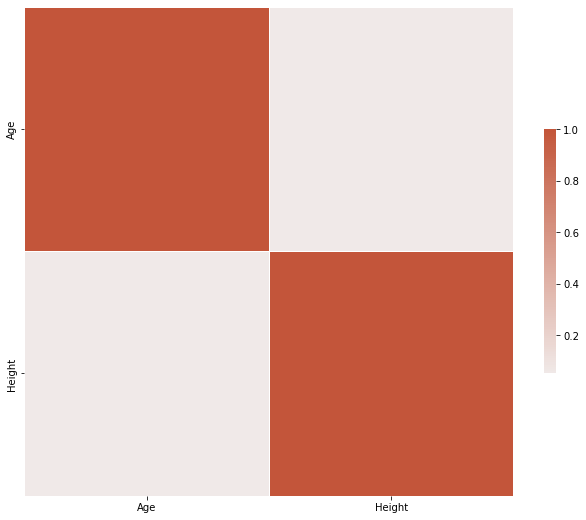

In [736]:
# Compute the correlation matrix
corr=data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

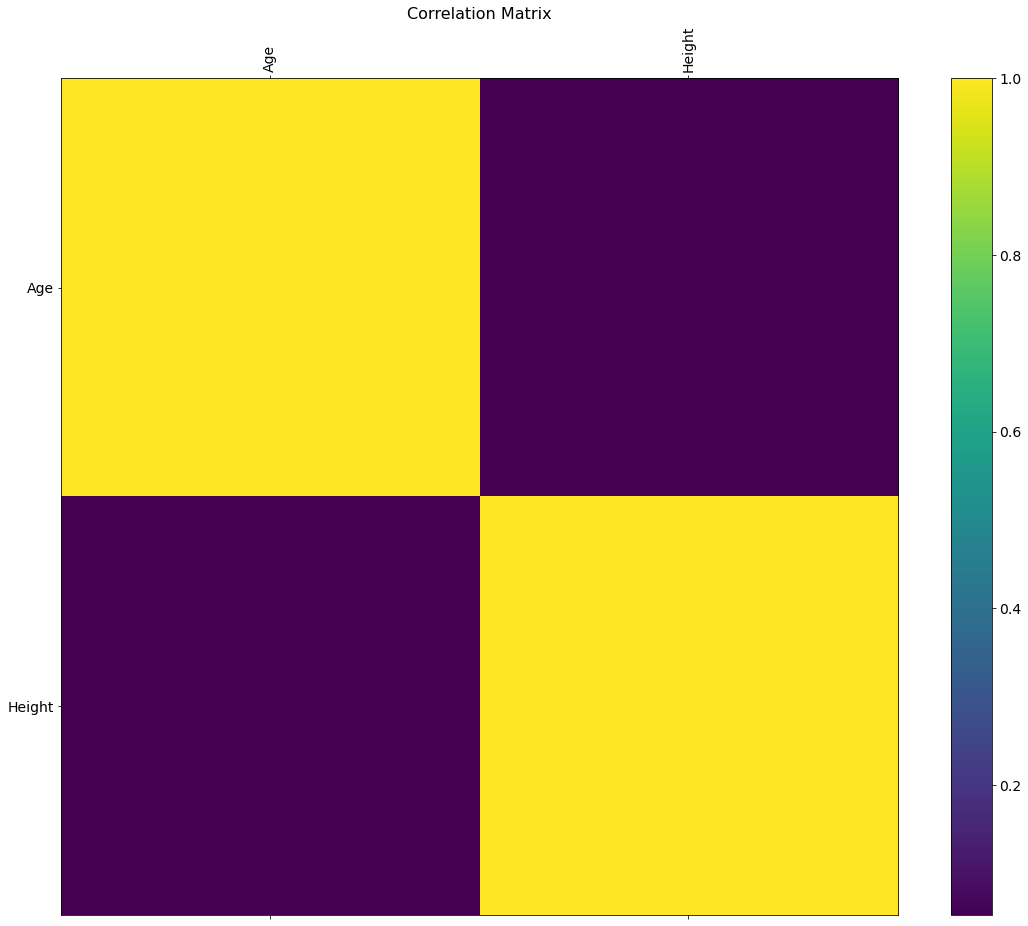

In [737]:
#plot phik matrix
#Plot - Pearson
f = plt.figure(figsize=(19, 15))  #price, carat and size (x, y, z) are most correlated
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation = 90)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [741]:

import phik
from phik import resources, report

# get the phi_k correlation matrix between all variables
data.phik_matrix()



interval columns not set, guessing: ['Age', 'Height']


,Mother_Tongue,Profession,Location,message,Age,Height,Religion,Caste,State_Region
Mother_Tongue,1.000000,0.195109,0.838779,0.690391,0.233490,0.260667,0.791017,0.964106,0.865773
Profession,0.195109,1.000000,0.193776,0.929373,0.189669,0.116633,0.133090,0.000000,0.274319
Location,0.838779,0.193776,1.000000,0.997505,0.305756,0.318821,0.618489,0.861638,0.652698
message,0.690391,0.929373,0.997505,1.000000,0.467949,0.000000,0.601395,0.000000,0.000000
Age,0.233490,0.189669,0.305756,0.467949,1.000000,0.134725,0.137127,0.354811,0.183504
Height,0.260667,0.116633,0.318821,0.000000,0.134725,1.000000,0.115287,0.354345,0.167027
Religion,0.791017,0.133090,0.618489,0.601395,0.137127,0.115287,1.000000,0.945931,0.440391
Caste,0.964106,0.000000,0.861638,0.000000,0.354811,0.354345,0.945931,1.000000,0.854592
State_Region,0.865773,0.274319,0.652698,0.000000,0.183504,0.167027,0.440391,0.854592,1.000000


interval columns not set, guessing: ['Age', 'Height']


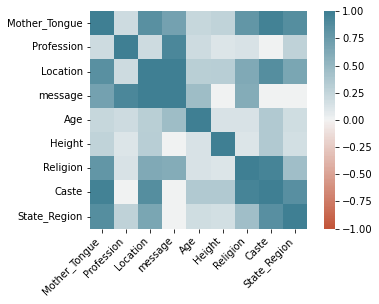

In [743]:
ax = sns.heatmap(
    data.phik_matrix(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

interval columns not set, guessing: ['Age', 'Height']


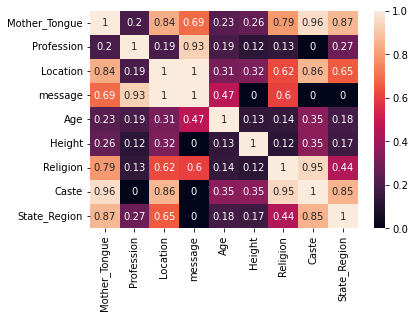

In [745]:
sns.heatmap(data.phik_matrix(), annot=True)

# To display the heatmap 
import matplotlib.pyplot as plt
plt.show()

# To save the heatmap as a file:
#fig = heatmap.get_figure()
#fig.savefig('heatmap.pdf')

Text(0, 0.5, 'Height')

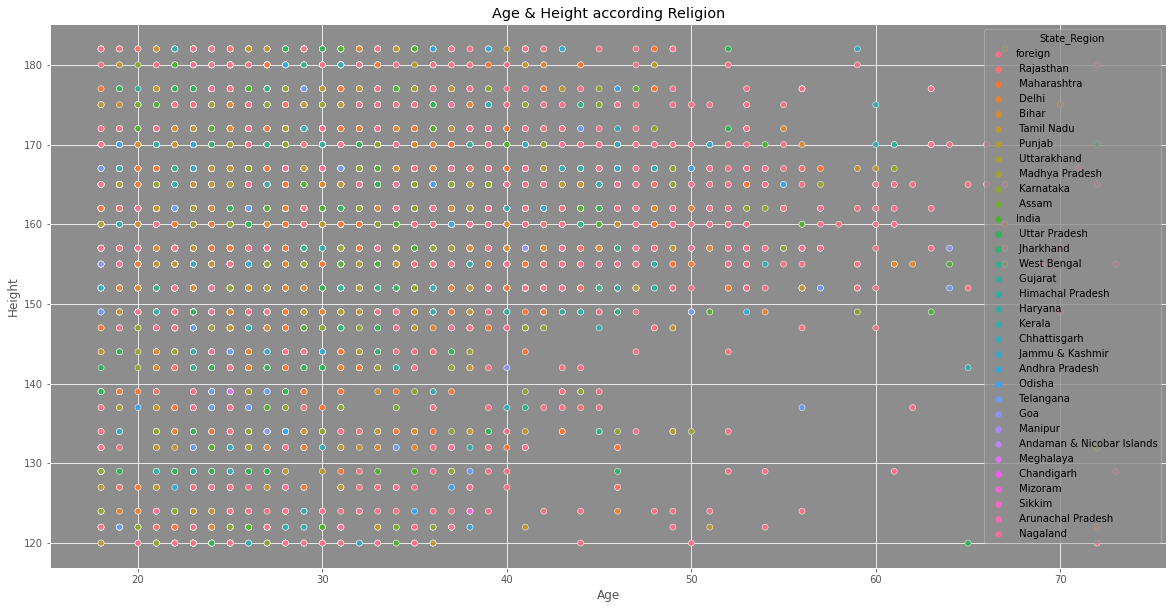

In [753]:
# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

#scatter two numeric
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='Age', y='Height', hue='State_Region', ax=ax)
plt.title("Age & Height according Religion")
      
    # giving X and Y labels
plt.xlabel("Age")
plt.ylabel("Height")

<AxesSubplot:>

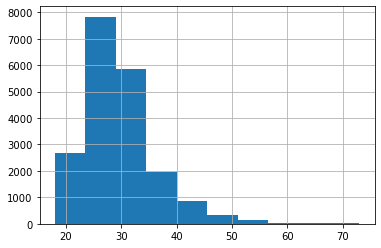

In [311]:
data['Age'].hist()

<AxesSubplot:>

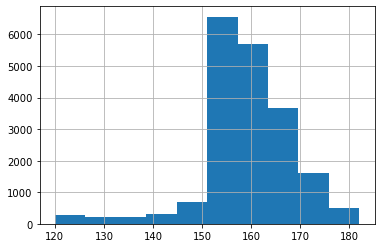

In [312]:
data['Height'].hist()

In [313]:
data['Religion'].value_counts()

Hindu             12321
Christian          2871
Muslim             2427
Sikh               1378
Jain                256
Buddhist            227
Other Religion      161
Atheist              76
Parsi                19
Name: Religion, dtype: int64

In [314]:
data = data.drop(data[data['Religion']=='Other'].index)
data = data.drop(data[data['Religion']=='Jew'].index)
data = data.drop(data[data['Religion']=='Other Religion'].index)
data.shape

(19575, 8)

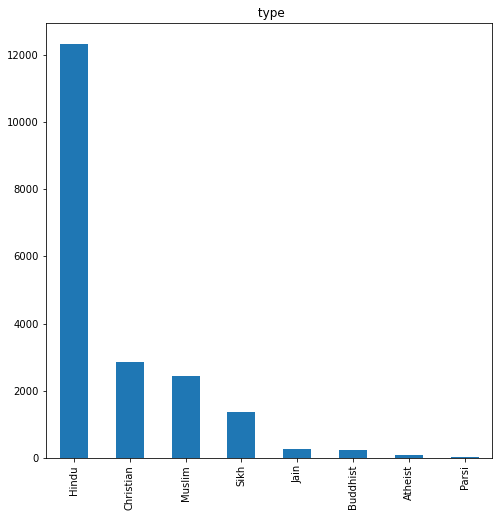

In [315]:
#HISTORAMME SUR 1 COLONNE
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.Religion.value_counts().plot(kind='bar', title=" type", ax=ax, figsize=(8,8))
plt.show()

In [330]:
data.Profession.value_counts()

Not Specified                        13197
Others                                1257
Non-Working                           1161
Teacher / Lecturer / Professor         414
Medical & Healthcare                   405
Doctor                                 389
Engineer                               307
Computer Professional                  306
HR, Admin & Managers                   275
Corporate                              269
Business / Consultant                  234
Student & Sports                       219
Banking & Finance                      216
Government / Defence                   210
CA, CS & Accountant                    151
Sales & Marketing                      128
Lawyer & Advocate                       66
Architect / Interior Designer           65
Scientist & Research                    62
Front Office & Executive                60
Hotels & Travel                         50
BPO & Call Centre                       46
Artist, Media & Journalist              43
Shipping & 

In [331]:
data = data.drop(data[data['Profession']=='Volunteer & Retired Person'].index)

In [340]:
group_profession = data.groupby(['Profession']).mean().sort_values(by=['Age'])

group_profession=group_profession.reset_index()


In [347]:
import plotly.graph_objs as go
import plotly.offline as py
# Traces
traces = px.scatter(group_profession, x='Age',y='Profession')

# Layout 
layout = go.Layout(width=700, height=900)
# Plot
py.iplot(go.Figure(data=traces, layout=layout));

In [399]:
data.Location.value_counts()


 India        13870
 Australia      941
 USA            910
 Malaysia       706
 Canada         596
              ...  
 Tunisia          1
 Albania          1
 Macau            1
 Bulgaria         1
 Somalia          1
Name: Location, Length: 120, dtype: int64

In [405]:
data.Location.unique()

array([' USA', ' India', ' Italy', ' Australia', ' UK', ' Canada',
       ' Mauritius', ' Senegal', ' Malaysia', ' Nigeria', ' Qatar',
       ' Germany', ' Iceland', ' UAE', ' New Zealand', ' Nepal',
       ' Namibia', ' Sri Lanka', ' Chagos', ' Togo', ' Armenia',
       ' Swaziland', ' Kuwait', ' Bangladesh', ' Singapore',
       ' United States Minor Outlying Islands', ' Algeria',
       ' Netherlands', ' IR', ' Bulgaria', ' Bahrain', ' Macau',
       ' Zambia', ' Turkey', ' Oman', ' Russia', ' Indonesia',
       ' Pakistan', ' Ghana', ' SY', ' Any', ' Hungary', ' Lebanon',
       ' Ireland', ' Taiwan', ' Saudi Arabia', ' Austria', ' France',
       ' Fiji', ' Romania', ' Jamaica', ' South Africa', ' Malawi',
       ' Sweden', ' Poland', ' Uganda', ' Philippines', ' Egypt',
       ' Argentina', ' Denmark', ' Burkina', ' Spain', ' Colombia',
       ' Albania', ' Tunisia', ' Czech Republic', ' Greece', ' Kenya',
       ' China', ' Malta', ' Others', ' Mexico', ' Reunion',
       ' Mada

In [400]:
databis = data.pivot_table(index='Profession', columns='Religion', values='Age' , aggfunc='mean');
databis.round()

Religion,Atheist,Buddhist,Christian,Hindu,Jain,Muslim,Parsi,Sikh
Profession,,,,,,,,
Architect / Interior Designer,NaN,33.0,33.0,28.0,NaN,28.0,NaN,28.0
"Artist, Media & Journalist",30.0,NaN,31.0,30.0,25.0,28.0,NaN,26.0
BPO & Call Centre,27.0,26.0,30.0,31.0,NaN,30.0,NaN,NaN
Banking & Finance,27.0,28.0,31.0,31.0,33.0,31.0,28.0,29.0
Business / Consultant,31.0,44.0,33.0,31.0,37.0,30.0,NaN,32.0
"CA, CS & Accountant",30.0,39.0,29.0,29.0,34.0,24.0,NaN,29.0
Civil & Allied Services,NaN,NaN,40.0,31.0,NaN,NaN,NaN,NaN
Computer Professional,27.0,NaN,30.0,29.0,29.0,29.0,NaN,29.0
Corporate,NaN,32.0,31.0,31.0,33.0,30.0,NaN,30.0


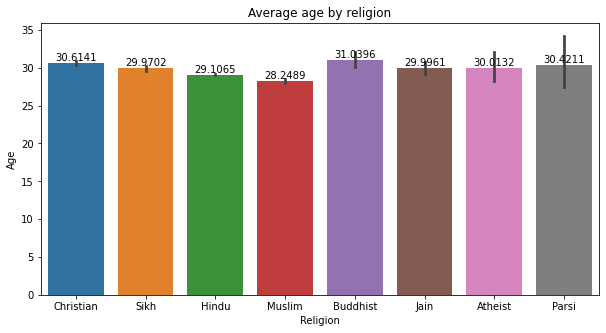

In [370]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Religion', y='Age', data=data)
ax.bar_label(ax.containers[0])
ax.set_title('Average age by religion')

plt.show(ax)



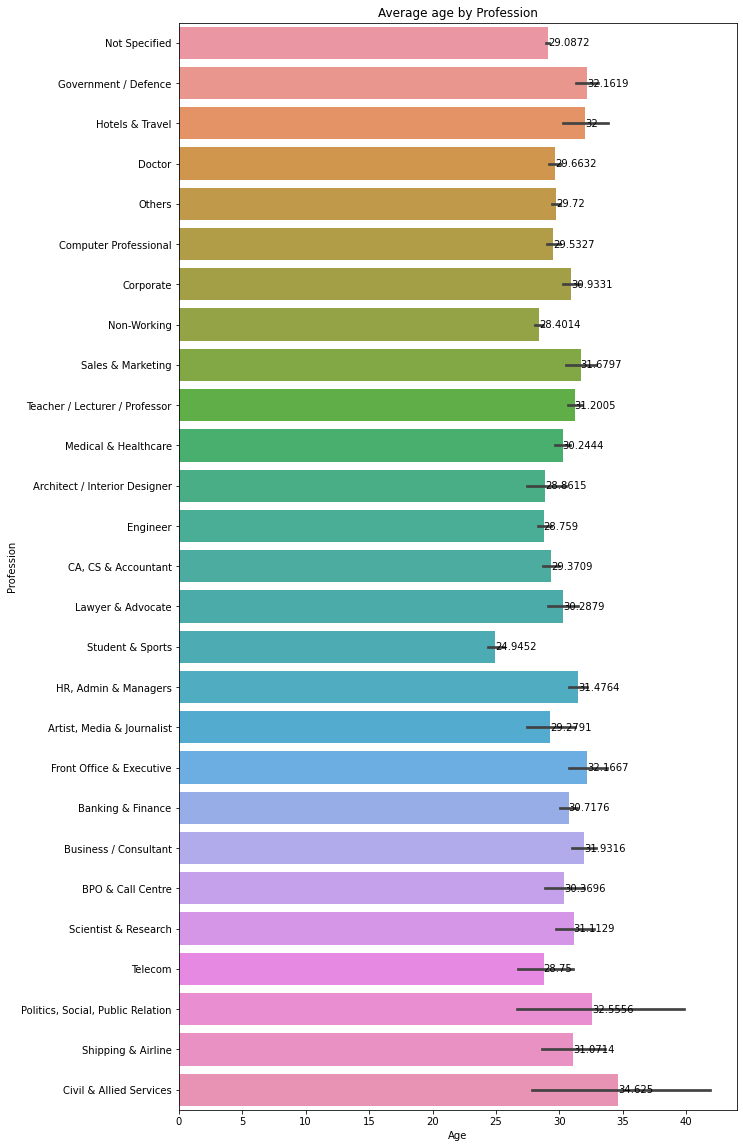

In [368]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.barplot(x='Age', y='Profession', data=data)
ax.bar_label(ax.containers[0])
ax.set_title('Average age by Profession')

plt.show()

In [363]:
import plotly.graph_objects as go
import plotly_express as px
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig=px.bar(databis, x=databis.index, y=['Atheist', 'Buddhist', 'Christian', 'Hindu', 'Jain', 'Muslim', 'Parsi','Sikh'])


fig.show()

# WORDCLOUD MESSAGE

In [371]:

data.message[2:20]

2     I am a simple girl with a good personality. I ...
3     I belong to "Roman Catholic" caste and I am in...
4     I am a simple girl with a good personality. I ...
5     I am a simple girl with a good personality. I ...
6     My Sister is a smart and dynamic girl brought ...
8     I am currently living in usa. I am a smart and...
9     My Relative is a smart and dynamic girl brough...
11    My Relative is a smart and dynamic girl brough...
12    I am a simple girl with a good personality. I ...
13    This profile is of my Daughter, who is simple ...
14    My Friend is a smart and dynamic girl brought ...
15    My Daughter is a smart and dynamic girl brough...
16    My Sister is a smart and dynamic girl brought ...
17    This profile is of my Daughter, who is simple ...
18    I am a simple girl with a good personality. I ...
21    My Daughter is a smart and dynamic girl brough...
22    I am a simple girl with a good personality. I ...
23    I am a simple girl with a good personality

In [372]:
# join all quote, in one text  
all_words_female = ' '.join(data.message)

# split into words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokens = word_tokenize(all_words_female)

# convert to lower case
tokens = [w.lower() for w in tokens]

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

# filter out stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['simple', 'girl', 'good', 'personality', 'reside', 'beautiful', 'city', 'read', 'daughter', 'smart', 'dynamic', 'girl', 'brought', 'well', 'nurtured', 'value', 'read', 'simple', 'girl', 'good', 'personality', 'reside', 'beautiful', 'city', 'read', 'belong', 'roman', 'catholic', 'caste', 'search', 'caring', 'kin', 'read', 'simple', 'girl', 'good', 'personality', 'reside', 'beautiful', 'city', 'read', 'simple', 'girl', 'good', 'personality', 'reside', 'beautiful', 'city', 'read', 'sister', 'smart', 'dynamic', 'girl', 'brought', 'well', 'nurtured', 'values', 'read', 'currently', 'living', 'usa', 'smart', 'dynamic', 'girl', 'respects', 'read', 'relative', 'smart', 'dynamic', 'girl', 'brought', 'well', 'nurtured', 'value', 'read', 'relative', 'smart', 'dynamic', 'girl', 'brought', 'well', 'nurtured', 'value', 'read', 'simple', 'girl', 'good', 'personality', 'reside', 'beautiful', 'city', 'read', 'profile', 'daughter', 'simple', 'good', 'looking', 'mother', 'read', 'friend']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [373]:
from wordcloud import WordCloud

stopword=[ 'see', 'dear', 'most', 'un','profile', 'living', 'reside', 'girl', 'mother', 'brought', 'well']
wordcloud = WordCloud(stopwords=stopword, collocations=True, 
                        width = 800, height = 800,
                        background_color='white').generate(' '.join(words))
wordcloud

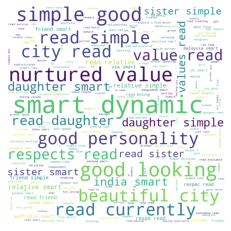

In [374]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [388]:
words
stopword=[ 'see', 'dear', 'most', 'un','profile', 'living', 'reside', 'girl', 'mother', 'brought', 'well', 'read']
for word in list(words):  # iterating on a copy since removing will mess things up
    if word in stopword:
        words.remove(word)
        
# find message with read inside   : data[data['message'].str.contains("read")] 

In [389]:
from nltk import FreqDist
fdist = FreqDist(words)

words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
words_df= words_df.sort_values(by='count', ascending=False)
words_df

,word,count
8,simple,9420
9,good,9240
2,smart,9003
3,dynamic,8983
0,currently,7203
...,...,...
1696,everybody,1
1695,asslamwalekum,1
1693,box,1
1692,expressed,1


In [390]:
d = words_df.nlargest(columns="count", n=10)
d = d.sort_values(by='count', ascending=False)
d['freq_rel'] = d['count']/(sum(d['count']))
d


,word,count,freq_rel
8,simple,9420,0.125441
9,good,9240,0.123044
2,smart,9003,0.119888
3,dynamic,8983,0.119622
0,currently,7203,0.095919
13,personality,7052,0.093908
14,beautiful,7011,0.093362
15,city,7004,0.093269
4,respects,5535,0.073707
1,india,4644,0.061842


In [393]:
# find message with mother inside   : 
data[data['message'].str.contains("india")]

,Mother_Tongue,Profession,Location,message,Age,Height,Religion,Caste
30,Gujarati,Teacher / Lecturer / Professor,", Mumbai, Maharashtra, India",I am currently living in india. I am a smart a...,30,152.0,Jain,Other
59,Hindi,Not Specified,", Saharanpur, Uttar Pradesh, India",I am currently living in india. I am a smart a...,29,149.0,Hindu,SC
61,Punjabi,Not Specified,", Ludhiana, Punjab, India",I am currently living in india. I am a smart a...,29,170.0,Hindu,Other Hindu
63,Hindi,Not Specified,", Noida, Uttar Pradesh, India",I am currently living in india. I am a smart a...,30,160.0,Hindu,Brahmin Tyagi
68,Hindi,Not Specified,", Vadodara, Gujarat, India",I am currently living in india. I am a smart a...,25,157.0,Hindu,Jaiswal
...,...,...,...,...,...,...,...,...
20942,Hindi,Not Specified,", India",I am currently living in india. I am a smart a...,30,157.0,Hindu,Rajput
20947,Sindhi,Not Specified,", Mumbai, Maharashtra, India",I am currently living in india. I am a smart a...,28,157.0,Hindu,Other
20948,Hindi,Teacher / Lecturer / Professor,", Delhi, India",I am currently living in india. I am a smart a...,37,162.0,Hindu,Jatav
20955,Malayalam,Not Specified,", Idukki, Kerala, India",I am currently living in india. I am a smart a...,30,157.0,Hindu,Ezhava


In [392]:
fig = px.bar(
    x=d['freq_rel'],
    y=d.word,
    orientation='h')
fig.update_layout(title="word for female")
fig.show()

# MALE MATRIMONIALE CHARACTERISTIC

In [380]:
data2 = pd.read_csv(r"C:\Users\sandr\OneDrive\Documents\A DATA\indiamatrimonymale.csv")
data2

,Age_Height,Religion_Caste,Mother_Tongue,Profession,Location,message
0,"24, 5' 06"" (167 cm)","Hindu, Khatri",Himachali,Not Specified,", Patiala, Punjab, India",I am currently living in india. I am a smart a...
1,"25, 5' 08"" (172 cm)","Hindu, Lingayath",Marathi,Not Specified,", Prakasam, Andhra Pradesh, India",I am currently living in india. I am a smart a...
2,"25, 5' 09"" (175 cm)","Muslim, Jat",Punjabi,Non-Working,", Not Specified, Australia",I am currently living in australia. I am a sma...
3,"35, 6' 00"" (182 cm)","Hindu, Other",Hindi,Not Specified,", UK","This profile is of my Son, who is simple and g..."
4,"23, 4' 10"" (147 cm)","Muslim, Other Muslim",Bengali,Not Specified,", Mauritius","This profile is of my Friend, who is simple an..."
...,...,...,...,...,...,...
20951,"22, 5' 06"" (167 cm)","Hindu, Other",Hindi,Not Specified,", Kanpur, Uttar Pradesh, India",I am a simple boy with a good personality. I r...
20952,"28, 5' 05"" (165 cm)","Hindu, Agarwal",Hindi,Not Specified,", Gurgaon, Haryana, India",My Son is a smart and dynamic boy brought up w...
20953,"29, 5' 10"" (177 cm)","Sikh, Labana",Punjabi,"HR, Admin & Managers",", New Zealand",I am a simple boy with a good personality. I r...
20954,"35, 5' 04"" (162 cm)","Hindu, Gurav",Marathi,Not Specified,", Mumbai, Maharashtra, India",I am currently living in india. I am a smart a...


In [381]:
data2.Profession.value_counts()

Not Specified                        12536
Others                                1928
Business / Consultant                 1162
Profession                             997
Engineer                               841
Computer Professional                  457
Sales & Marketing                      362
Government / Defence                   324
Banking & Finance                      260
Corporate                              239
HR, Admin & Managers                   238
Hotels & Travel                        226
Medical & Healthcare                   194
CA, CS & Accountant                    172
Non-Working                            170
Teacher / Lecturer / Professor         147
Doctor                                 135
Student & Sports                       101
Architect / Interior Designer           84
BPO & Call Centre                       73
Front Office & Executive                67
Lawyer & Advocate                       60
Scientist & Research                    44
Artist, Med

In [382]:

data2.message[2:20]

2     I am currently living in australia. I am a sma...
3     This profile is of my Son, who is simple and g...
4     This profile is of my Friend, who is simple an...
5     I am a simple girl with a good personality. I ...
6     I am currently living in usa. I am a smart and...
7     I am currently living in malaysia. I am a smar...
8     I am a simple boy with a good personality. I r...
9     I am a simple boy with a good personality. I r...
10    You see my dear,My son is God fearing nice, ca...
11    My Friend is a smart and dynamic boy brought u...
12    I am a simple boy with a good personality. I r...
13    I am currently living in india. I am a smart a...
14    I am currently living in usa. I am a smart and...
15    I am currently living in india. I am a smart a...
16    This profile is of my Relative, who is simple ...
17    My Brother is a Smart and Dynamic Boy Brought ...
18    I am currently living in turkey. I am a smart ...
19    My Brother is a smart and dynamic boy brou

In [383]:
# join all quote, in one text  
all_words_male = ' '.join(data2.message)

# split into words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokens2 = word_tokenize(all_words_male)

# convert to lower case
tokens2 = [w.lower() for w in tokens2]

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped2 = [w.translate(table) for w in tokens2]

# remove remaining tokens that are not alphabetic
words2 = [word for word in stripped2 if word.isalpha()]

# filter out stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words2 if not w in stop_words]
print(words[:100])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['currently', 'living', 'india', 'smart', 'dynamic', 'boy', 'respects', 'h', 'read', 'currently', 'living', 'india', 'smart', 'dynamic', 'boy', 'respects', 'h', 'read', 'currently', 'living', 'australia', 'smart', 'dynamic', 'boy', 'respec', 'read', 'profile', 'son', 'simple', 'good', 'looking', 'mother', 'tongu', 'read', 'profile', 'friend', 'simple', 'good', 'looking', 'mother', 'read', 'simple', 'girl', 'good', 'personality', 'reside', 'beautiful', 'city', 'read', 'currently', 'living', 'usa', 'smart', 'dynamic', 'boy', 'respects', 'read', 'currently', 'living', 'malaysia', 'smart', 'dynamic', 'boy', 'respect', 'read', 'simple', 'boy', 'good', 'personality', 'reside', 'beautiful', 'city', 'read', 'simple', 'boy', 'good', 'personality', 'reside', 'beautiful', 'city', 'read', 'see', 'dear', 'son', 'god', 'fearing', 'nice', 'caring', 'honest', 'sincere', 'un', 'read', 'friend', 'smart', 'dynamic', 'boy', 'brought', 'well', 'nurtured', 'values']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


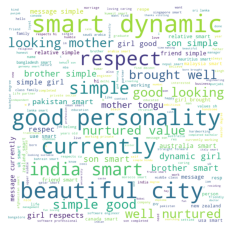

In [384]:
from wordcloud import WordCloud

stopword=['h', 'see', 'dear', 'most', 'un','profile', 'living', 'reside', 'boy', 'read']
wordcloud = WordCloud(stopwords=stopword, collocations=True, 
                        width = 800, height = 800,
                        background_color='white').generate(' '.join(words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [385]:
words
stopword=['h', 'see', 'dear', 'most', 'un','profile', 'living', 'reside', 'boy', 'read']
for word in list(words):  # iterating on a copy since removing will mess things up
    if word in stopword:
        words.remove(word)

from nltk import FreqDist
fdist = FreqDist(words)

words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
words_df= words_df.sort_values(by='count', ascending=False)
words_df

,word,count
8,simple,9420
9,good,9240
2,smart,9003
3,dynamic,8983
0,currently,7203
...,...,...
1700,everybody,1
1699,asslamwalekum,1
1697,box,1
1696,expressed,1


In [386]:
d = words_df.nlargest(columns="count", n=10)
d = d.sort_values(by='count', ascending=False)
d['freq_rel'] = d['count']/(sum(d['count']))
d


,word,count,freq_rel
8,simple,9420,0.125441
9,good,9240,0.123044
2,smart,9003,0.119888
3,dynamic,8983,0.119622
0,currently,7203,0.095919
15,personality,7052,0.093908
16,beautiful,7011,0.093362
17,city,7004,0.093269
4,respects,5535,0.073707
1,india,4644,0.061842


In [387]:
fig = px.bar(
    x=d['freq_rel'],
    y=d.word,
    orientation='h')
fig.update_layout(title="Principal word for male")
fig.show()
